# Lab 2: Methods in Linear Regression

## Problems:

### Problem 1: Bootstrapping a Confidence Interval

If we don't have a formula for the confidence interval of a statistic, we can often estimate it by sampling from out data set many times, computing the statistic of interest, and then plotting the distribution. This is known as __bootstrapping__ the confidence interval, since you're using the data to make estimates about your fits, effectively pulling yourself up by your bootstraps. In this problem, we will see how to boot strap the confidence interval for the $\beta$ parameters in the linear fit.

__Continue with the Lab2 Master file.__ Lets return to the one variable examples of fitting the sales price to the first floor square footage __1stFlrSF__. Using a for loop, compute $\beta_0$ and $\beta_1$ 1000 times for samples of size $N = 1436$ __with replacement__ and store their results in vectors, as in the code below.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import io
import requests

# If there is a problem loading the data, download the data file first.
url = "https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/Ames/train.csv"
s = requests.get(url).content
ames = pd.read_csv(io.StringIO(s.decode('utf-8')))
ames

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
# Remove outliers
z = ames['GrLivArea']+ames['BsmtUnfSF']<4000
print("Number of records removed:",len(ames) - sum(z))
data = ames[z]

Number of records removed: 24


In [3]:
# Select numerical variables only
data = data.select_dtypes(include=['int64','float64'])
display(data.head(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
# Remove 'MSSubClass' categorical variable
data = data.drop(columns= 'MSSubClass')
data.head(5)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
from sklearn.linear_model import LinearRegression

# Set sampling times and sample size
N = 1000
sample_size = 1436

# Create beta0 and beta1 for parameters
beta0 = np.zeros(N)
beta1 = np.zeros(N)


for i in range(N):

    # Sampling
    sample_data = data.sample(n=sample_size, replace=True, random_state=i)
    X_sample = sample_data['1stFlrSF'].values.reshape(-1, 1)
    y_sample = sample_data['SalePrice'].values.reshape(-1, 1)

    # Use sklearn LinearRegression()
    model = LinearRegression()
    model.fit(X_sample, y_sample)

    # extract beta0 和 beta1
    beta0[i] = model.intercept_
    beta1[i] = model.coef_[0]



__Turn in__

1. Plot a histogram of $\beta_0$ and $\beta_1$.
2. Using `beta0.sort()`, sort the values and find the interval containing the middle 950 values. This is the bootstrap 95% confidence interval.
3. Using the formulas from (Section 4.Statistics for ML. Sec4StatisticsML.pdf page 17.), compute the confidence interval. Remember that here you use all of the training data. Compare your results.


#### Problem 1-1
Plot a histogram of $\beta_0$ and $\beta_1$.

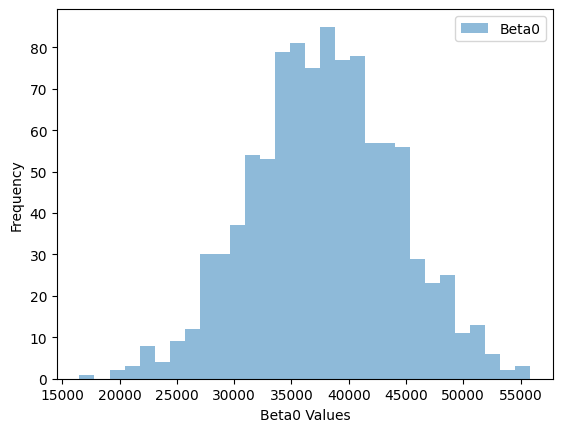

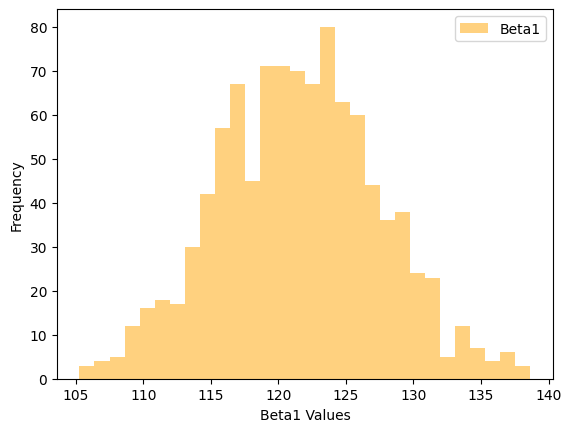

In [6]:
# 𝛽0 histogram
plt.hist(beta0, bins=30, alpha=0.5, label='Beta0')
plt.xlabel('Beta0 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 𝛽1 histogram
plt.hist(beta1, bins=30, alpha=0.5, color='orange', label='Beta1')
plt.xlabel('Beta1 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Problem 1-2
Using `beta0.sort()`, sort the values and find the interval containing the middle 950 values. This is the bootstrap 95% confidence interval.

In [7]:
# sorting beta0
sorted_beta0 = np.sort(beta0)

# Find middle 950 values' index
lower_index = int((N - 950) / 2)
upper_index = int(lower_index + 950)

# Extract middle 950 values from sorted_beta0
bootstrap_interval = sorted_beta0[lower_index:upper_index]

# Calculate upper & lower bound of Confidence Interval
lower_bound = bootstrap_interval[0]
upper_bound = bootstrap_interval[-1]

print("Bootstrap 95% Confidence Interval for beta0:", (lower_bound, upper_bound))

Bootstrap 95% Confidence Interval for beta0: (25293.367866176006, 49831.23895500375)


In [8]:
# sorting beta1
sorted_beta1 = np.sort(beta1)

# Find middle 950 values' index
lower_index = int((N - 950) / 2)
upper_index = int(lower_index + 950)

# Extract middle 950 values from sorted_beta0
bootstrap_interval = sorted_beta1[lower_index:upper_index]

# Calculate upper & lower bound of Confidence Interval
lower_bound = bootstrap_interval[0]
upper_bound = bootstrap_interval[-1]

print("Bootstrap 95% Confidence Interval for beta1:", (lower_bound, upper_bound))

Bootstrap 95% Confidence Interval for beta1: (109.92376766783717, 133.74158160812465)


#### Problem 1-3
Using the formulas from (Section 4.Statistics for ML. Sec4StatisticsML.pdf page 17.), compute the confidence interval.


In [9]:
import numpy as np
from scipy.stats import norm

# Calculate the sample mean and standard error of the sample mean
mean_beta0 = np.mean(beta0)
SE_beta0 = np.std(beta0) / np.sqrt(len(beta0))

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the critical value for the given confidence level
z_critical = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_critical * SE_beta0

# Calculate the confidence interval
lower_bound = mean_beta0 - margin_of_error
upper_bound = mean_beta0 + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for beta0: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval for beta0: (37416.62, 38203.14)


In [10]:
import numpy as np
from scipy.stats import norm

# Calculate the sample mean and standard error of the sample mean
mean_beta1 = np.mean(beta1)
SE_beta1 = np.std(beta1) / np.sqrt(len(beta1))

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the critical value for the given confidence level
z_critical = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_critical * SE_beta1

# Calculate the confidence interval
lower_bound = mean_beta1 - margin_of_error
upper_bound = mean_beta1 + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for beta1: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval for beta1: (121.14, 121.88)


Comparing the confidence intervals obtained from the sorting method and the formula, we find that the values are similar but not exactly the same.

### Problem 2: Linear Methods on High Dimensional Data

Perform ridge regression and lasso regression on the MRI Slices dataset on blackboard. You should follow the __Loading the Viewing MRI Slices__ notebook, eventually loading all slices into Python as a data matrix, with all picture dimensions flattened. The text and code for that process has been reproduced below.

We want to fit the MRI Slices data to the __Normalized Whole-brain Volume (nWBV)__ in the labels data.


__Turn in__:

1. Given the train-test split with seed random_state=$255$, what is the best $\alpha$ value for pure Ridge Regression? Justify your answer.
2. Given the train-test split with seed random_state=$255$, what is the best $\lambda$ value for pure Lasso Regression? Justify your answer.
3. (Bonus) What is the best $(\alpha,\lambda)$ value for elastic net regression?

You may set the downsample rate to higher you are unable to compute the linear model.

random_state= 255 will fix the random set. See Wiki for a quick explanation.  https://en.wikipedia.org/wiki/Random_seed
Or https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ for some more details.

### Load MRI All Files

To load all of the files into an array we need to be able to search through the directory. Luckily, this is easy to do using the labels file, since each file name is stored there. We just need to loop through the __Filename__ column in the `labels` dataset and load them into an array one by one. There are 702 files in total.

With the array there are two ways we can load them in: First, we can load them into a $609\times 176 \times 176$ array, which is the best option if we care about the 2D structure. However for algorithms like linear regression that can not see the 2D structure, we may want to flatten the images to a $609\times 30976$ array (note that $30976 = 176 \times 176$). Its easy enough two switch back and forth between the two array structures later. We will start with the flattened array.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/labels.csv")
display(labels)


,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


#### Downsampling

In [13]:
file_dir = '/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/MRI_Images/'

DS = 8             # Downsample rate, must be a multiple of 30976

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)


data = np.zeros([609, im_size])

for i, file_name in enumerate(labels.Filename):
    img = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
    data[i,:] = img[::DS]            # Downsample the image

In [38]:
data.shape

(609, 3872)

#### Problem 2-1. Given the train-test split with seed random_state= 255 , what is the best  𝛼  value for pure Ridge Regression?

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [40]:
# Set random seed
random_state = 255

# Split dataset to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels['nWBV'], test_size=0.2, random_state=random_state)

# Define alpha value
alphas = [0.1, 1.0, 10.0, 100.0]

best_alpha = None
best_mse = float('inf')

# Iterate alpha values to find the optimal alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Print out the best alpha value
print("Best 𝛼 value for pure Ridge Regression:", best_alpha)


Best 𝛼 value for pure Ridge Regression: 10.0


The best 𝛼 value was chosen based on minimizing the mean squared error (MSE) on the test set. This 𝛼 value of **10** resulted in the lowest MSE, indicating that it provides the best trade-off between bias and variance in the Ridge Regression model. Therefore, it is the most suitable 𝛼 value for this problem.

#### Problem 2-2. Given the train-test split with seed random_state= 255 , what is the best  𝜆  value for pure Lasso Regression?

In [41]:
# Lasso model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define alpha values
alphas = [0.01, 0.1, 1.0, 10.0]

# Set a empty dictionary to store alpha and its MSE
mse_dict = {}

# Iterate different alphas and find out its MSE
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[alpha] = mse

# Print out alpha and MSE
for alpha, mse in mse_dict.items():
    print(f"Alpha = {alpha}: MSE = {mse}")


Alpha = 0.01: MSE = 0.002272801148575733
Alpha = 0.1: MSE = 0.002272801148575733
Alpha = 1.0: MSE = 0.002272801148575733
Alpha = 10.0: MSE = 0.002272801148575733


In [42]:
# Lasso Cross Validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Define alpha values
alphas = [0.01, 0.1, 1.0, 10.0]

# LassoCV to find out the optimal alpha
lasso = LassoCV(alphas=alphas, cv=5)  # 5 fold cross validation
lasso.fit(X_train, y_train)
best_lambda = lasso.alpha_

# Evaluate Lasso on testing set
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print out the best alpha value
print("Best λ value for pure Lasso Regression:", best_lambda)
mse

Best λ value for pure Lasso Regression: 10.0


0.002272801148575733

By iterating through different α values and using Lasso cross-validation, we observed that the MSE did not significantly vary with changes in α. This lack of differentiation in MSE may be attributed to the small size of the dataset. When the dataset is sufficiently large, it can better reflect performance variations across different α values in Lasso regression.

#### Problem 2-3. (Bonus) What is the best  (𝛼, 𝜆)  value for elastic net regression?

In [43]:
# Elastic Net regression
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

# Set Elastic Net alphas and lamda
alphas = [0.01, 0.1, 1.0, 10.0]
lamda = [0.1, 0.5, 0.7, 0.9]

elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=lamda, cv=5)  # 5 fold cross validaton

# Train model
elastic_net_cv.fit(X_train, y_train)

# Select best alpha and lamda
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

# Evaluate elastic net model
y_pred = elastic_net_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print out the result
print("Best α value for Elastic Net:", best_alpha)
print("Best 𝜆 for Elastic Net:", best_l1_ratio)
print("MSE on test set:", mse)


Best α value for Elastic Net: 10.0
Best 𝜆 for Elastic Net: 0.1
MSE on test set: 0.002272801148575733
